In [61]:
import pandas as pd
import numpy as np
adult = pd.read_csv('/Users/shan/Desktop/SMU/Fall Mod B/Data Mining/Assignment1/adult.csv',
                    header=None,
                    names=["age", "workclass", "fnlwgt", "education","education_num", "marital_status", 
                           "occupation", "relationship","race","sex", "capital_gain", 
                           "capital_loss", "hours_per_week","native_country","income"],
                   sep=',\s',
                   na_values=["?"],
                   engine='python')
print("No.of observations:" ,adult.shape[0])
print("No.of Variables:" ,adult.shape[1])

No.of observations: 32561
No.of Variables: 15


In [62]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
pd.DataFrame(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


""


In [64]:
data_types_dict = {'education_num': str}
adult = adult.astype(data_types_dict)
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [65]:
numeric_variables = []
numeric_variables.append(adult.select_dtypes(include = ['int64', 'float64']))
#print(numeric_variables)
numeric_variables[0].agg(['min','max','median','mean', 'std', 'skew', 'kurtosis'])

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000
median,37.000000,1.783560e+05,0.000000,0.000000,40.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
skew,0.558743,1.446980e+00,11.953848,4.594629,0.227643
kurtosis,-0.166127,6.218811e+00,154.799438,20.376802,2.916687


In [66]:
numeric = adult.select_dtypes(include = ['int64', 'float64'])
numeric.agg(['nunique'])

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
nunique,73,21648,119,92,94


In [67]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [68]:
for n in numeric :
    adult[n] = np.where(np.abs(adult[n] - adult[n].mean()) > (3 * adult[n].mean()), np.nan, adult[n])

In [69]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt              35
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain      1834
capital_loss      1511
hours_per_week       0
native_country     583
income               0
dtype: int64

In [70]:
for n in numeric:
    adult[n].fillna(value = adult[n].mean(), inplace = True)
    
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [77]:
categorical = adult.select_dtypes(include = ['object'])
for i in categorical:
    print(i,adult[i].unique())


workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education_num ['13' '9' '7' '14' '5' '10' '12' '11' '4' '16' '15' '3' '6' '2' '1' '8']
marital_status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native_country ['United-States' 'Cub

In [78]:
adult.workclass.unique()

[]


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [23]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [24]:
for n in categorical:
    adult[n].fillna(value = adult[n].mode()[0], inplace = True)
    
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

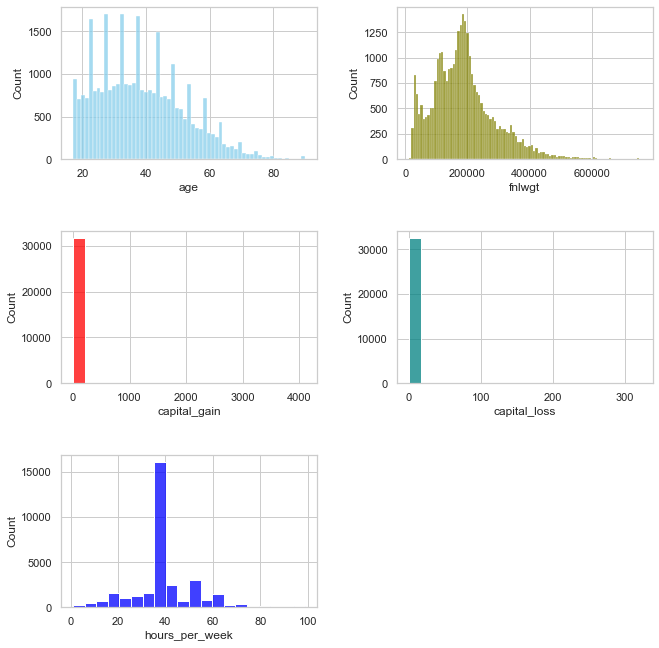

In [79]:
import seaborn as sb
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)


# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer

sb.set_style("whitegrid")
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
plt.tight_layout(h_pad=4, pad=4)
axes[2, 1].remove()
sb.histplot( adult["age"] , color="skyblue", ax=axes[0, 0])
sb.histplot( adult["fnlwgt"] , color="olive", ax=axes[0, 1])
sb.histplot( adult["capital_gain"] , bins=20, color="red", ax=axes[1, 0])
sb.histplot( adult["capital_loss"] , bins=20, color="teal", ax=axes[1, 1])
sb.histplot( adult["hours_per_week"] , bins=20, color="blue", ax=axes[2, 0]).get_figure().savefig(buffer, format='svg')

<AxesSubplot:ylabel='fnlwgt'>

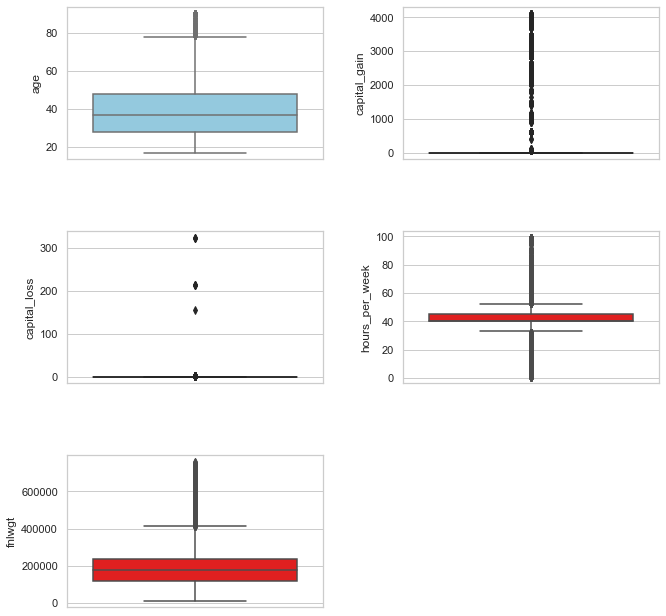

In [80]:
import seaborn as sb
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)


# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer

sb.set_style("whitegrid")
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
plt.tight_layout(h_pad=4, pad=4)
axes[2, 1].remove()
sb.boxplot( y=adult["age"], color="skyblue", ax=axes[0, 0])
sb.boxplot( y=adult["capital_gain"],color="olive", ax=axes[0, 1])
sb.boxplot( y=adult["capital_loss"], color="teal", ax=axes[1, 0])
sb.boxplot( y=adult["hours_per_week"],color="red", ax=axes[1, 1])
sb.boxplot( y=adult["fnlwgt"],color="red", ax=axes[2,0])
#sb.boxplot( x=adult["age"], y=adult['income'], color="skyblue", ax=axes[0, 0])
#sb.boxplot( x=adult["capital_gain"], y=adult['income'], color="olive", ax=axes[0, 1])
#.get_figure().savefig(buffer, format='svg')




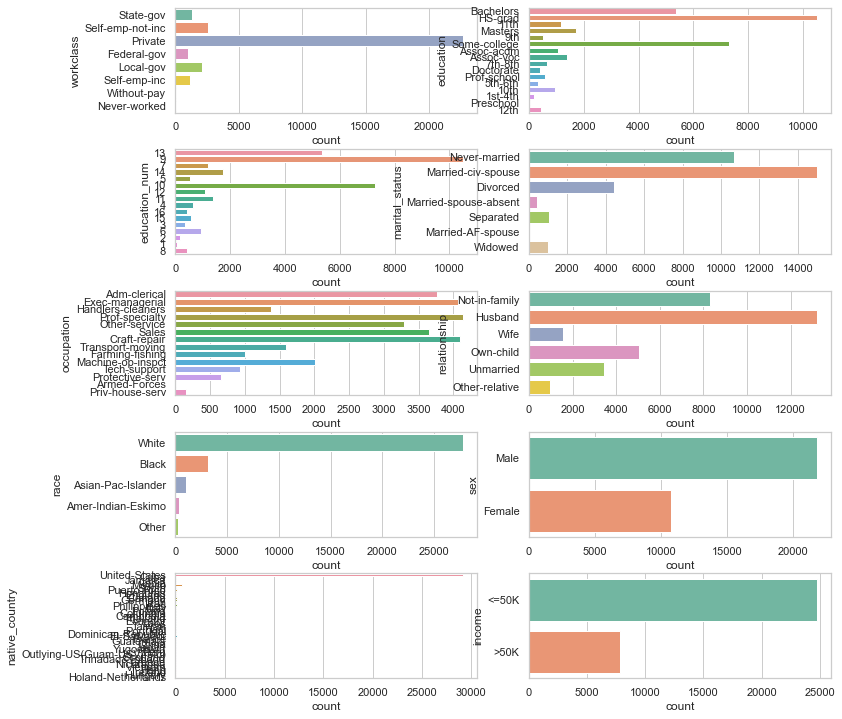

In [81]:
import seaborn as sb
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (5,5)

# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer
sb.set_style("whitegrid")
sb.set_palette("Set2")
f, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=False)
#axes[3, 1].remove()
#plt.tight_layout(h_pad=2, w_pad=4, pad=6)
plt.tight_layout()
sb.countplot( y=adult["workclass"] , ax=axes[0, 0])
sb.countplot( y=adult["education"] , ax=axes[0, 1])
sb.countplot( y=adult["education_num"] , ax=axes[1, 0])
sb.countplot( y=adult["marital_status"] , ax=axes[1, 1])
sb.countplot( y=adult["occupation"] , ax=axes[2, 0])
sb.countplot( y=adult["relationship"] , ax=axes[2, 1])
sb.countplot( y=adult["race"] , ax=axes[3, 0])
sb.countplot( y=adult["sex"] , ax=axes[3, 1])
sb.countplot( y=adult["native_country"] , ax=axes[4, 0])
sb.countplot( y=adult["income"] , ax=axes[4, 1]).get_figure().savefig(buffer, format='svg')

# Bring plots back to KNIME node output port
output_image = buffer.getvalue()

In [82]:
adult=pd.get_dummies(adult)

In [83]:
adult.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39.0,77516.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50.0,83311.0,0.0,0.0,13.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38.0,215646.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53.0,234721.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28.0,338409.0,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
X =adult.drop(columns=['income_>50K'])

In [85]:
y = adult['income_>50K']

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=120)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred= gnb.predict(X_test)

Accuracy=accuracy_score(y_test,y_pred)
print(Accuracy)

print(classification_report(y_test, y_pred))

0.7627341727723423
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     17262
           1       0.51      0.64      0.57      5531

    accuracy                           0.76     22793
   macro avg       0.69      0.72      0.70     22793
weighted avg       0.79      0.76      0.77     22793



0.7208555349577352


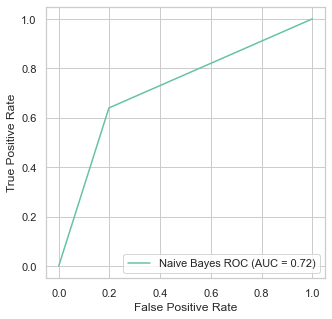

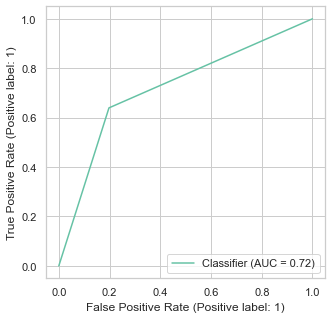

In [88]:
roc=roc_auc_score(y_test, y_pred)
print(roc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Naive Bayes ROC')
display.plot()
plt.show()

RocCurveDisplay.from_predictions(y_test, y_pred)

In [89]:

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)
print(score)

0.746544991883473


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
pipe.score(X_test, y_test)


1.0

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[16965   297]
 [ 5480    51]]


In [92]:
Accuracy=accuracy_score(y_test,predictions)
print(Accuracy)

0.746544991883473


In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     17262
           1       0.15      0.01      0.02      5531

    accuracy                           0.75     22793
   macro avg       0.45      0.50      0.44     22793
weighted avg       0.61      0.75      0.65     22793



In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=None)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree)
print(r)

|--- feature_120 <= 0.50
|   |--- class: 1
|--- feature_120 >  0.50
|   |--- class: 0



In [95]:
Accuracy=accuracy_score(y_test,predictions)
print(Accuracy)

0.746544991883473


In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
    
expected_y  = y_test
predicted_y = model.predict(X_test)
    
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17262
           1       1.00      1.00      1.00      5531

    accuracy                           1.00     22793
   macro avg       1.00      1.00      1.00     22793
weighted avg       1.00      1.00      1.00     22793

[[17262     0]
 [    0  5531]]


/Users/shan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income_>50K'>

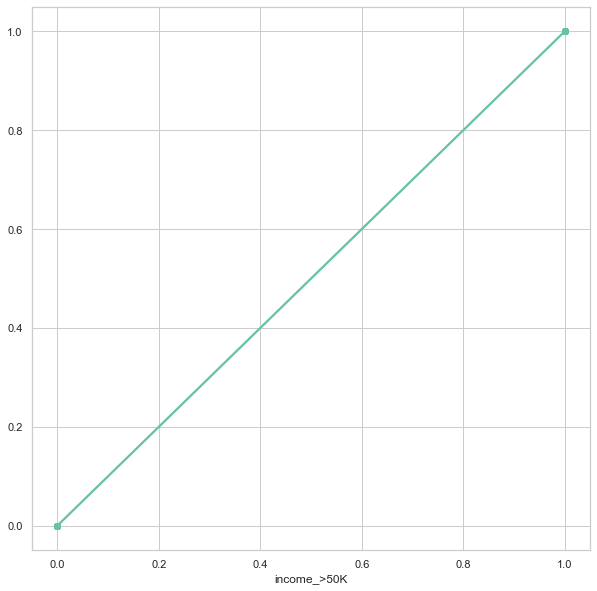

In [97]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.regplot(expected_y,predicted_y,fit_reg=True)

[Text(0.5, 0.75, 'X[120] <= 0.5\ngini = 0.361\nsamples = 9768\nvalue = [7458, 2310]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2310\nvalue = [0, 2310]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7458\nvalue = [7458, 0]')]

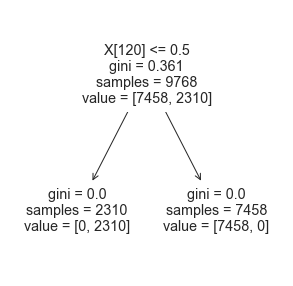

In [98]:
from sklearn import tree
clf = model.fit(X_train, y_train)
tree.plot_tree(clf)

In [99]:
from sklearn.ensemble import RandomForestClassifier
caf=RandomForestClassifier(n_estimators=100)
caf.fit(X_train,y_train)
y_pred=caf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
